# Imports

In [6]:
# data viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

# data
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 45)

# env vars
import os
from dotenv import load_dotenv

True

In [7]:
#Consants
load_dotenv(verbose=True, override=True)

PICKLE_PATH=os.getenv("PICKLE_PATH")
DATA_PATH = os.getenv("DATA_PATH")
RANDOM_STATE = os.getenv("RANDOM_STATE")

topics = ['Subtle Cues',
       'True Confessional', 'Experimental Facility', 'Newborn Child', 'Wilderness', 'Automotive',
       "In The House", 'Violent Action', 'Bones & Flesh', 'Medical', 'Technology', 'Party Hard',
       'Neighborhood', "Food", 'Night Terrors', 'Family', 'What Was That Sound?', 'Evil Spirit', 'Schools Out Forever',
       'The Ocean', 'Contemplation', 'Crime & Punishment']

# Word Clouds

In [6]:
df_word_strengths = pd.read_pickle(f'{PICKLE_PATH}/word_strengths.pkl')

In [44]:
def make_wordcloud(df, topic, max_words=10): 
    keys = df[df['topic']==topic]['word'].tolist()
    values = df[df['topic']==topic]['strength'].tolist()
    dictionary = dict(zip(keys, values))

    wordcloud = WordCloud(width=1280, height=720, background_color="white",max_words=max_words).generate_from_frequencies(dictionary)
    # show
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

 strength        word
 0.440192         nod
 0.399834        sigh
 0.346331        lean
 0.310210      nodded
 0.285260       smile
 0.283147       shrug
 0.278744      glance
 0.272009    shoulder
 0.257529       frown
 0.253807     chuckle
 0.248625       pause
 0.227201       chair
 0.223350     whisper
 0.216652       shake
 0.215557        grin
 0.214926  expression
 0.214859       sorry
 0.210574        seat
 0.205823        gaze
 0.196949       laugh
 0.189947         lip
 0.183956        wave


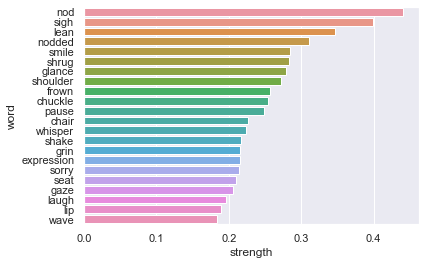

In [45]:
print(df_word_strengths[df_word_strengths['topic']=='Subtle Cues'][['strength','word']].to_string(index=False))
sns.barplot('strength','word', data=df_word_strengths[df_word_strengths['topic']=='Subtle Cues'])

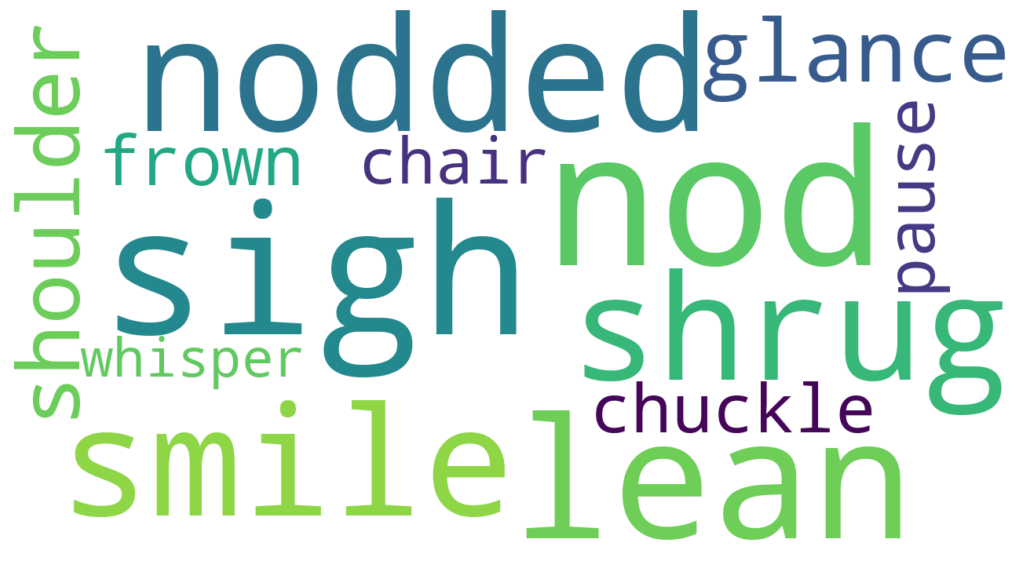

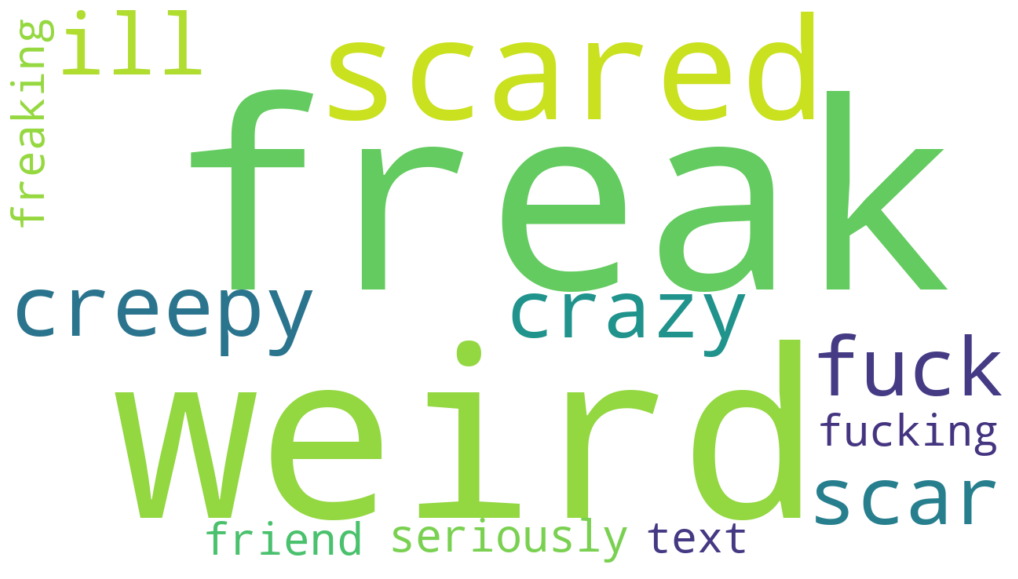

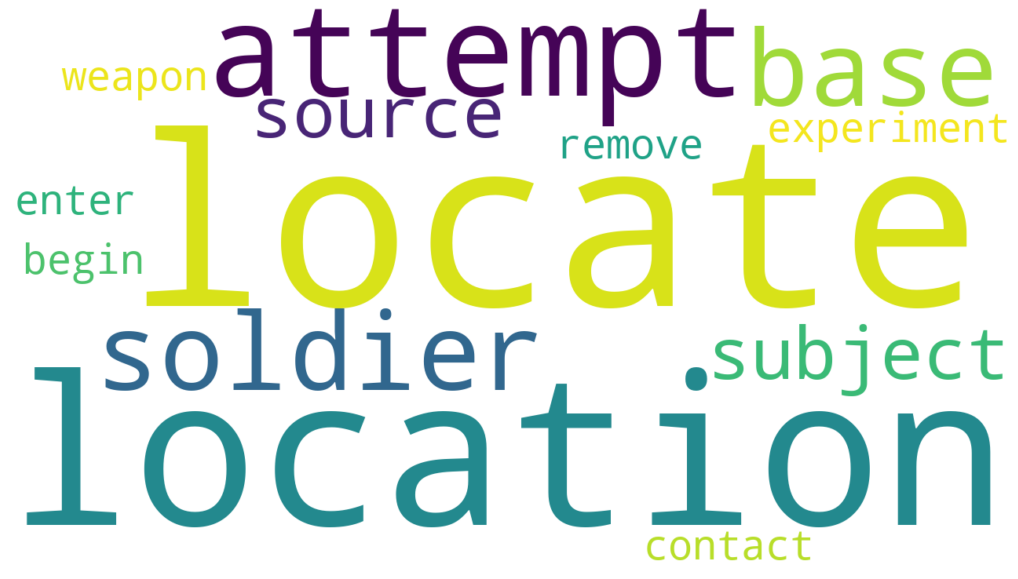

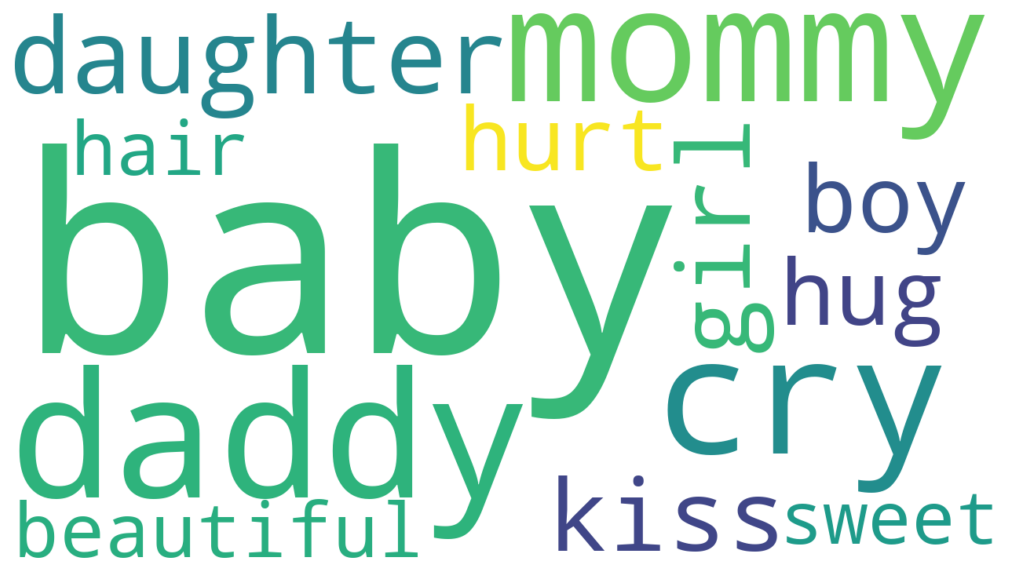

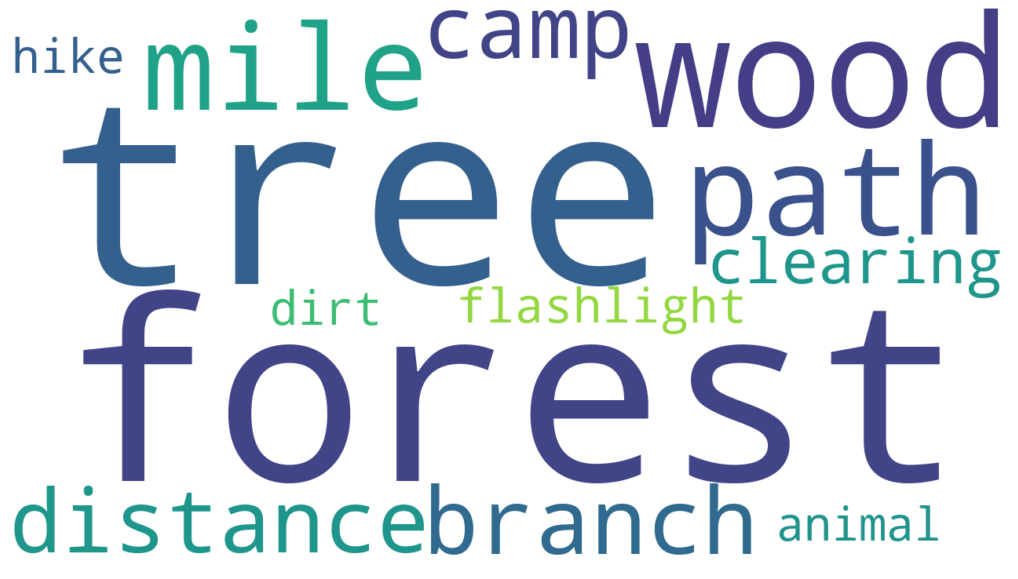

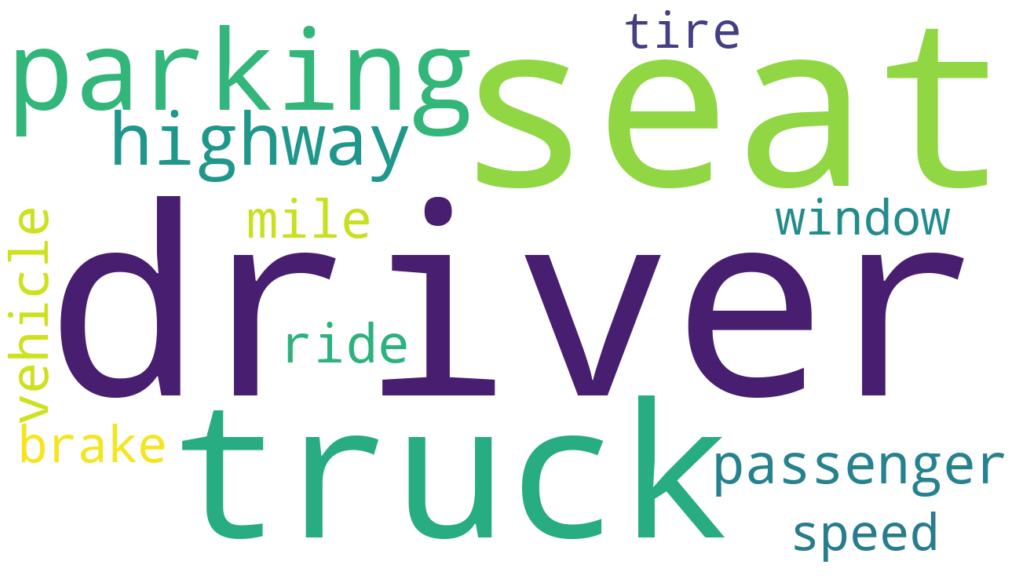

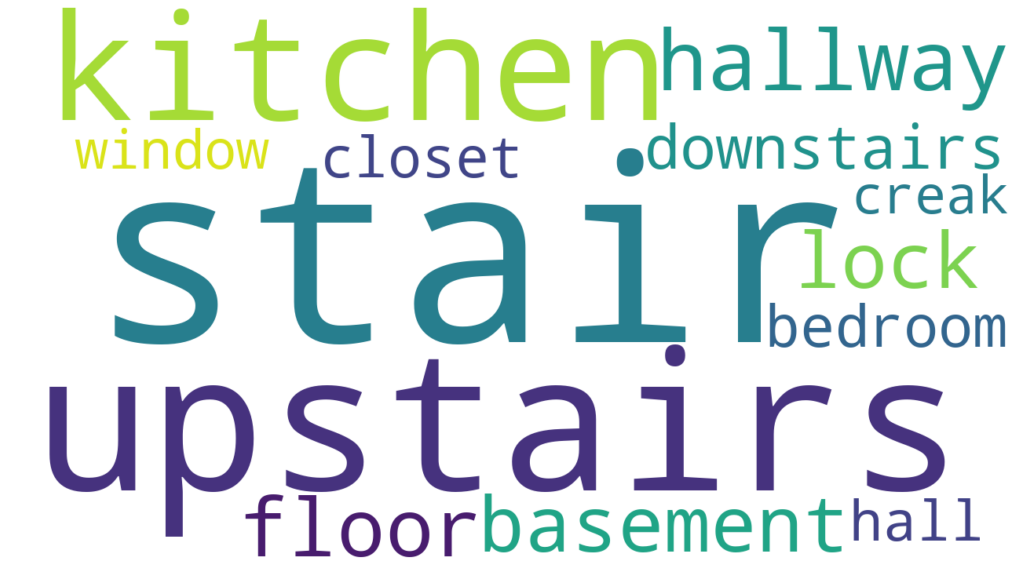

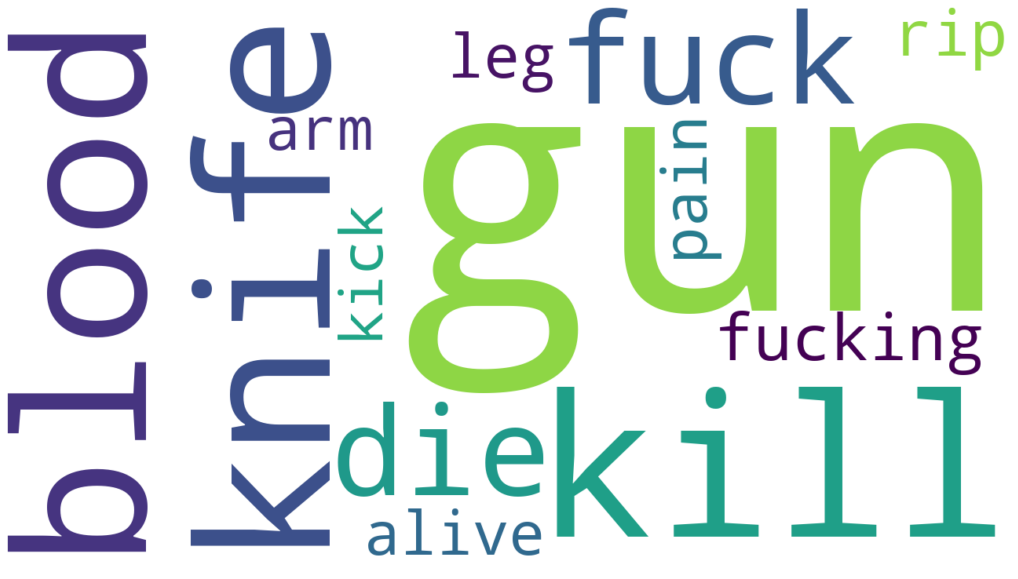

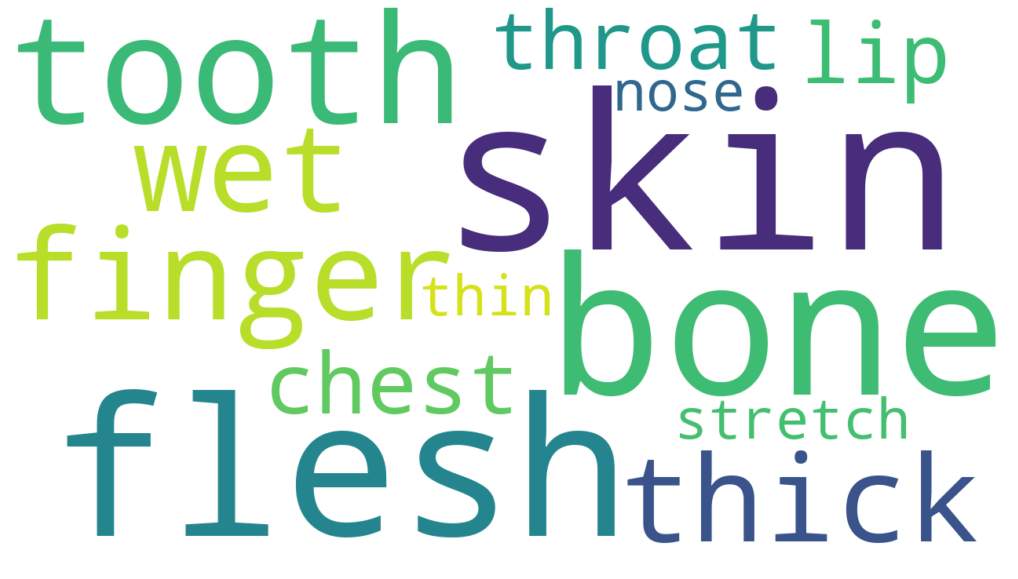

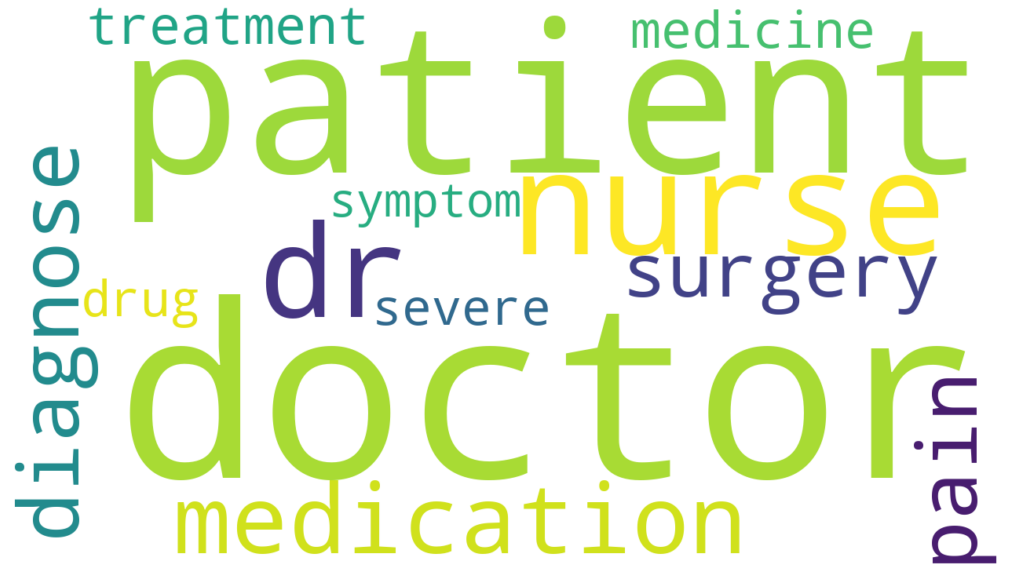

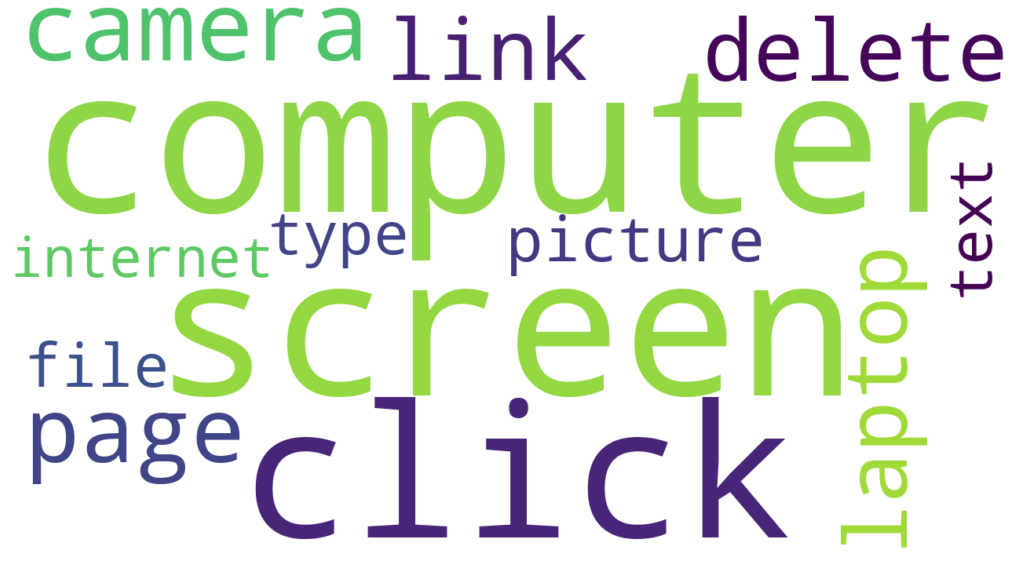

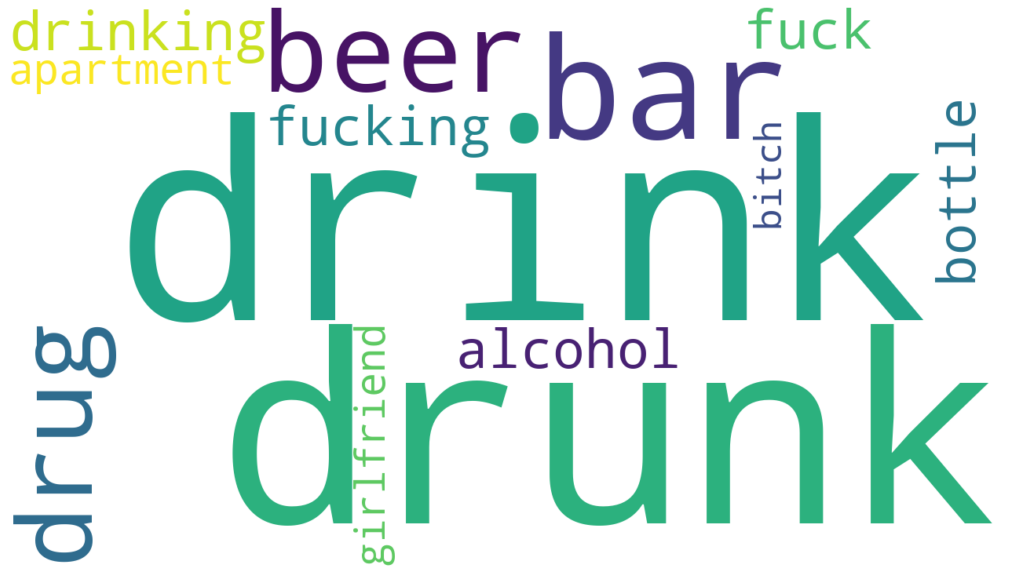

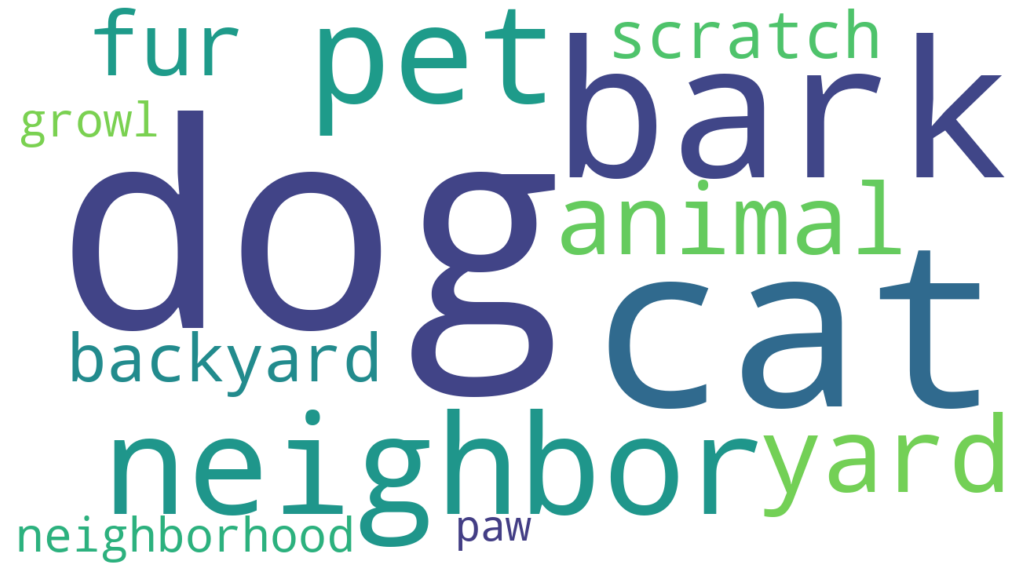

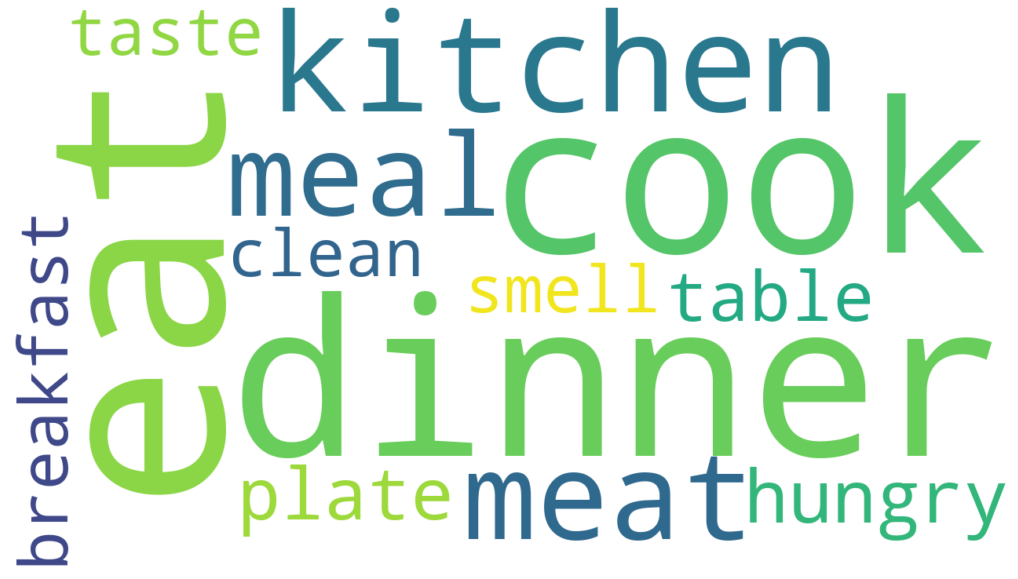

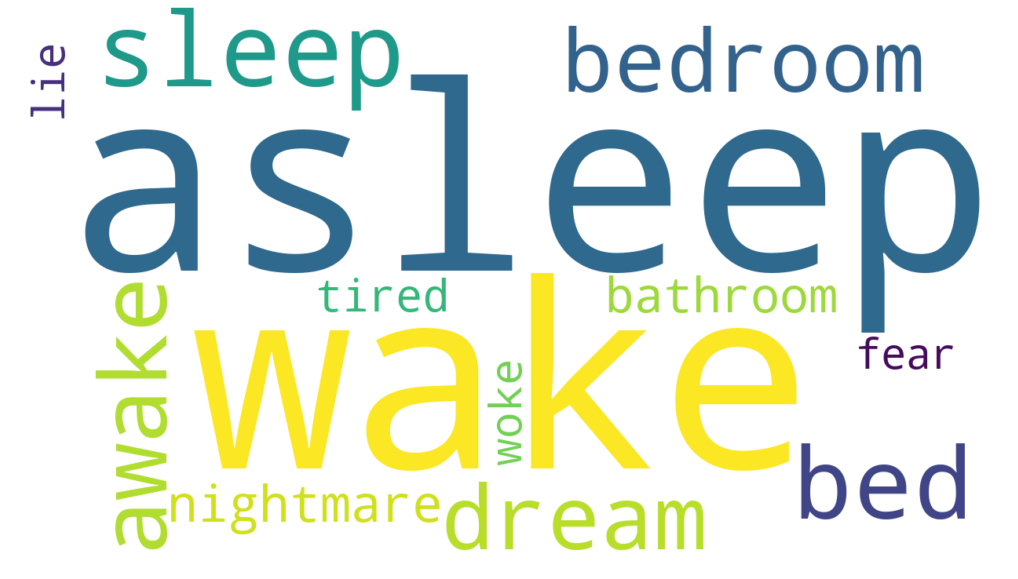

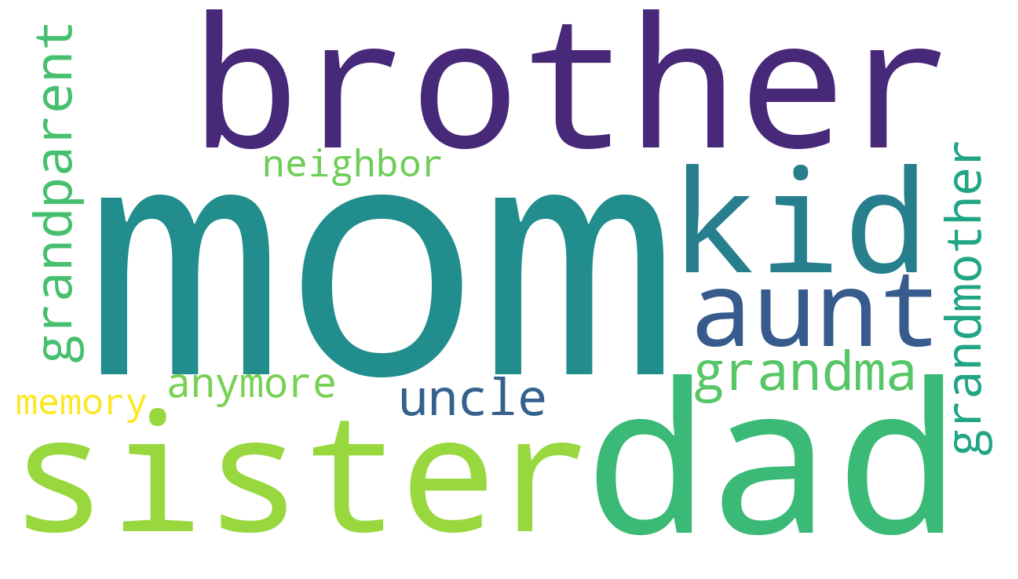

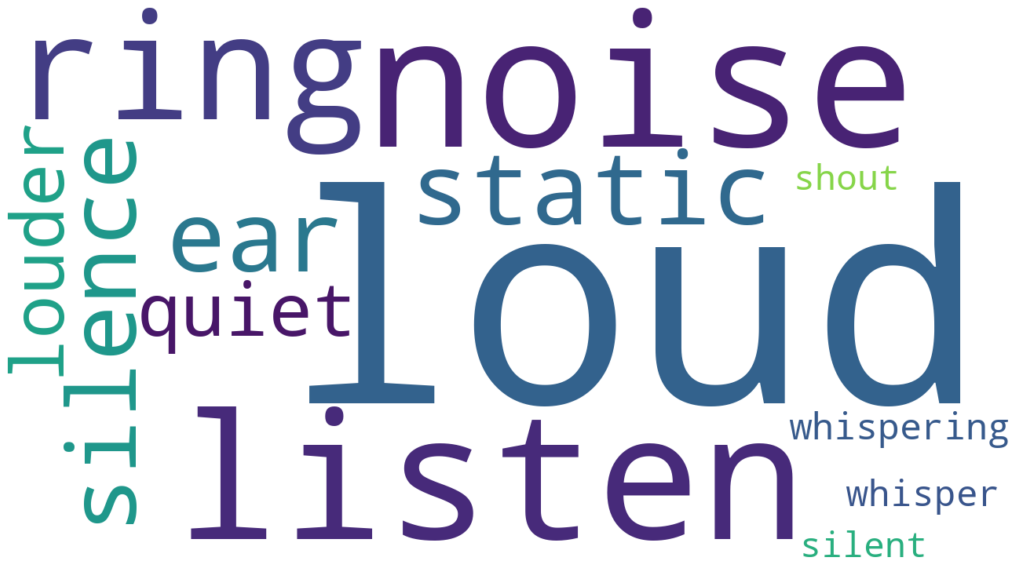

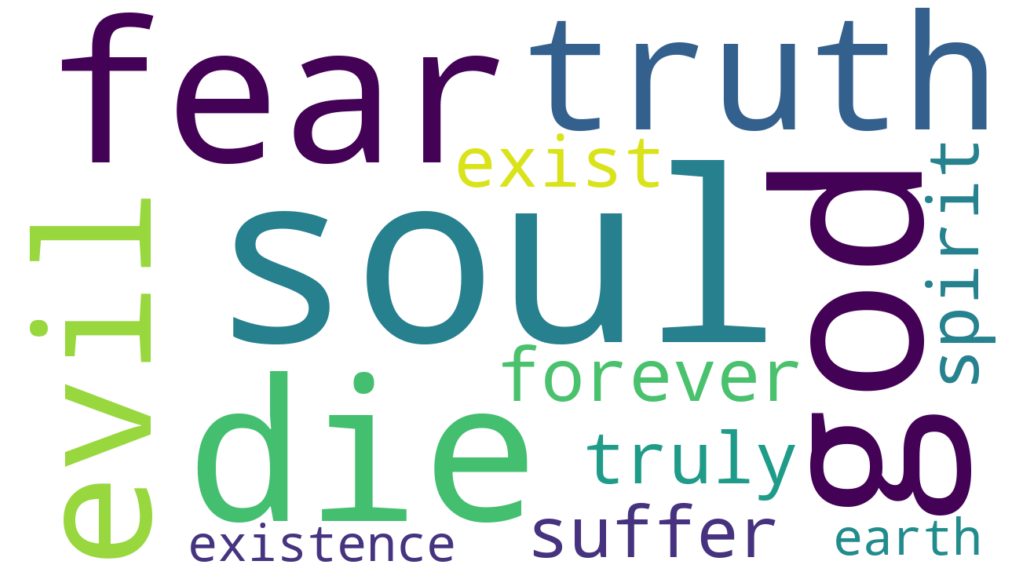

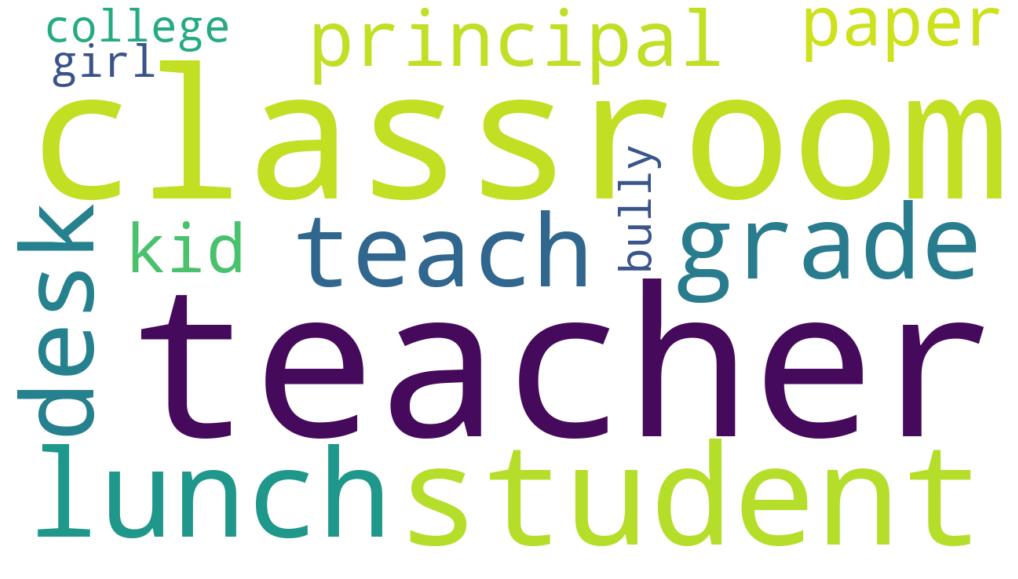

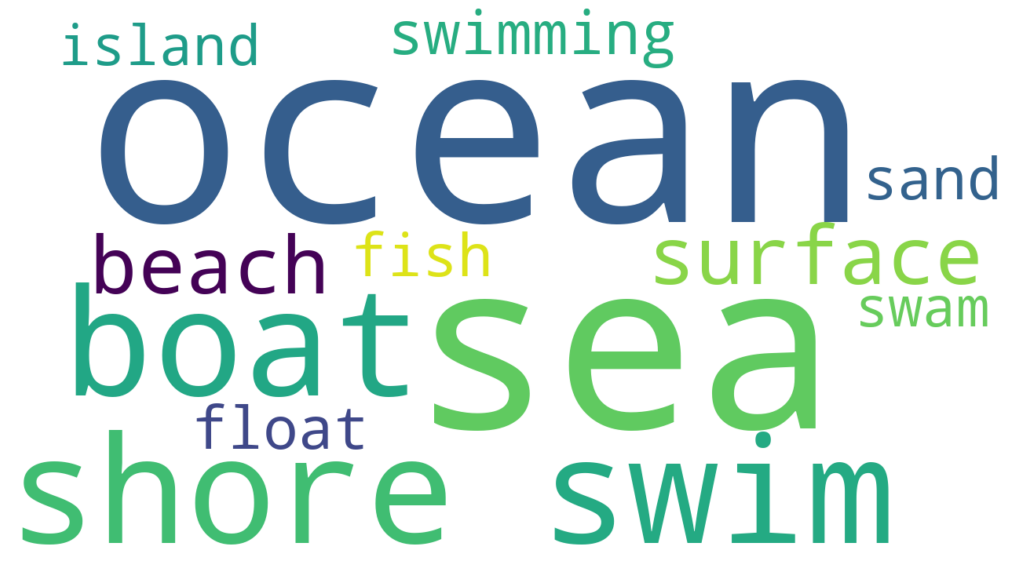

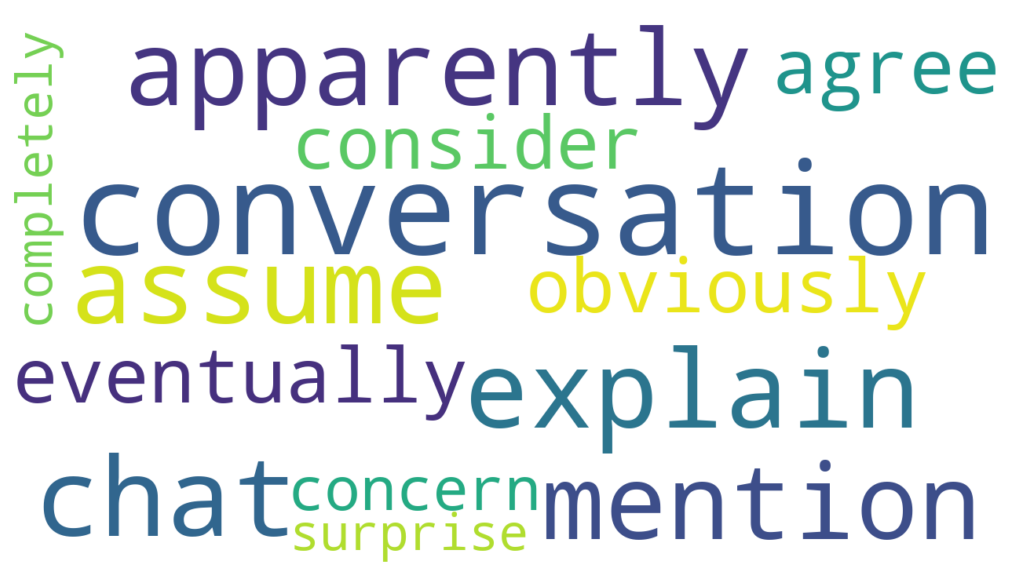

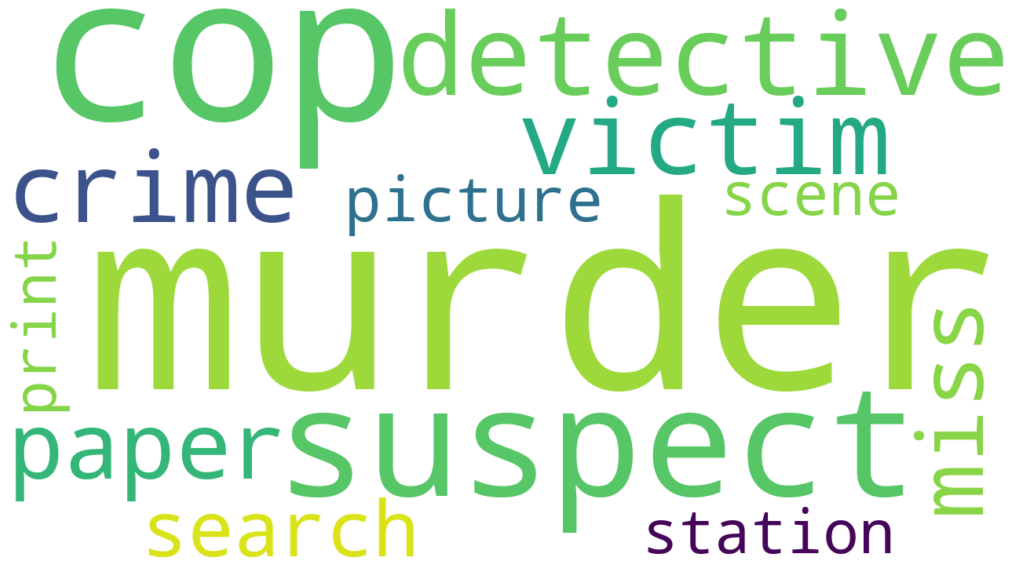

In [46]:
for topic in topics:
    make_wordcloud(df_word_strengths, topic,max_words=13)

# Examine top stories 

In [80]:
df.groupby(['created_year', 'created_month', 'max_topic'])['score'].mean()

created_year  created_month  max_topic           
2010          3              Automotive               32.000000
                             Crime & Punishment       21.333333
                             Evil Spirit               9.000000
                             Family                   23.750000
                             In The House             57.000000
                                                        ...    
2019          11             The Ocean                66.166667
                             True Confessional        19.083333
                             Violent Action          389.692308
                             What Was That Sound?    282.000000
                             Wilderness               98.000000
Name: score, Length: 2471, dtype: float64

In [83]:
df[df['created_year']==2019].sort_values(by='score', ascending=False).head()

,author,created_utc,created_year,created_month,score,num_comments,full_link,title,selftext,Subtle Cues,True Confessional,Experimental Facility,Newborn Child,Wilderness,Automotive,In The House,Violent Action,Bones & Flesh,Medical,Technology,Party Hard,Neighborhood,Food,Night Terrors,Family,What Was That Sound?,Evil Spirit,Schools Out Forever,The Ocean,Contemplation,Crime & Punishment,max_topic,top1,top2,top3,1+2,1+2+3,total_topics_weight,top1_percent,top1_score
1,EaPAtbp,2019-10-16 20:00:36,2019,10,24861,1020,https://www.reddit.com/r/nosleep/comments/diuu...,My sugar daddy asks me for weird favors,"His Tinder profile said he was 45, but he look...",0.010185,0.006103,0.000000,0.001811,0.007312,0.024427,0.051721,0.000000,0.000000,0.000000,0.052346,0.013464,0.001856,0.054171,0.027253,0.000000,0.013164,0.000000,0.029131,0.000000,0.000000,0.022129,Food,Food,Technology,In The House,Food+Technology,Food+In The House+Technology,0.315074,0.171931,0.054171
9,Verastahl,2019-05-21 16:41:42,2019,5,13648,437,https://www.reddit.com/r/nosleep/comments/brco...,My job is watching a woman trapped in a room.,\nThree years ago I was looking at the local j...,0.026959,0.016823,0.031413,0.000231,0.010284,0.000000,0.013628,0.000000,0.000000,0.014561,0.066925,0.002744,0.001044,0.023898,0.020510,0.009293,0.000000,0.000000,0.024421,0.002413,0.008333,0.023678,Technology,Technology,Experimental Facility,Subtle Cues,Experimental Facility+Technology,Experimental Facility+Subtle Cues+Technology,0.297155,0.225218,0.066925
13,deathbyproxy,2019-05-19 13:00:58,2019,5,12503,354,https://www.reddit.com/r/nosleep/comments/bqgo...,"My sister discovered a universal language, but...",My sister is a genius. When she was about thir...,0.030784,0.001044,0.032215,0.006478,0.009842,0.000000,0.003377,0.000000,0.034716,0.003978,0.013429,0.000000,0.000000,0.000000,0.034258,0.009410,0.024023,0.057639,0.013178,0.019954,0.023615,0.000000,Evil Spirit,Evil Spirit,Bones & Flesh,Night Terrors,Bones & Flesh+Evil Spirit,Bones & Flesh+Evil Spirit+Night Terrors,0.317940,0.181289,0.057639
14,flard,2019-03-24 12:46:07,2019,3,12392,553,https://www.reddit.com/r/nosleep/comments/b4vy...,She Sold Happiness in Glass Jars,"The poster read, “Happiness! Sold in Glass Jar...",0.026373,0.010743,0.000000,0.042126,0.009903,0.028332,0.011406,0.006219,0.005800,0.002263,0.017071,0.034105,0.000000,0.009826,0.014824,0.006215,0.020931,0.001851,0.011162,0.012437,0.004479,0.019890,Newborn Child,Newborn Child,Party Hard,Automotive,Newborn Child+Party Hard,Automotive+Newborn Child+Party Hard,0.295958,0.142339,0.042126
16,RisingMac,2019-05-25 06:52:58,2019,5,12304,1034,https://www.reddit.com/r/nosleep/comments/bsrm...,My son's camera monitor alerted in the middle ...,I'm a nurse and I currently work nights. It's ...,0.005711,0.065455,0.019580,0.000000,0.000000,0.000000,0.026838,0.003372,0.002678,0.012286,0.023405,0.000000,0.008181,0.003486,0.046009,0.014250,0.053176,0.000000,0.017414,0.000000,0.005420,0.000000,True Confessional,True Confessional,What Was That Sound?,Night Terrors,True Confessional+What Was That Sound?,Night Terrors+True Confessional+What Was That ...,0.307262,0.213027,0.065455


In [84]:
df[df['created_year']==2018].sort_values(by='score', ascending=False).head()

,author,created_utc,created_year,created_month,score,num_comments,full_link,title,selftext,Subtle Cues,True Confessional,Experimental Facility,Newborn Child,Wilderness,Automotive,In The House,Violent Action,Bones & Flesh,Medical,Technology,Party Hard,Neighborhood,Food,Night Terrors,Family,What Was That Sound?,Evil Spirit,Schools Out Forever,The Ocean,Contemplation,Crime & Punishment,max_topic,top1,top2,top3,1+2,1+2+3,total_topics_weight,top1_percent,top1_score
2,athousandrows,2018-04-15 20:02:42,2018,4,18410,646,https://www.reddit.com/r/nosleep/comments/8chs...,I met someone who claimed to be the devil... a...,Let me start off by saying that I’m not partic...,0.039633,0.000000,0.010575,0.008582,0.001519,0.003922,0.0,0.007046,0.019690,0.000000,0.001719,0.060935,0.006077,0.016051,0.000000,0.008587,0.000000,0.079053,0.000000,0.001144,0.047124,0.000000,Evil Spirit,Evil Spirit,Party Hard,Contemplation,Evil Spirit+Party Hard,Contemplation+Evil Spirit+Party Hard,0.311657,0.253655,0.079053
3,RyanMatthews_,2018-07-04 19:49:47,2018,7,15856,735,https://www.reddit.com/r/nosleep/comments/8w4g...,My girlfriend talks in her sleep. She's been s...,I’m infatuated with her. \n\nUtterly infatuate...,0.027220,0.027514,0.000000,0.003320,0.002906,0.000000,0.0,0.000000,0.001849,0.009396,0.002676,0.015330,0.000000,0.002625,0.058498,0.000000,0.019721,0.027607,0.000000,0.000000,0.044200,0.000000,Night Terrors,Night Terrors,Contemplation,Evil Spirit,Contemplation+Night Terrors,Contemplation+Evil Spirit+Night Terrors,0.242862,0.240867,0.058498
4,MTLStoriesPaty,2018-03-12 15:44:52,2018,3,15825,305,https://www.reddit.com/r/nosleep/comments/83vw...,Letter from the girl who watched you grow up,"Hi,\n\nThe first time I saw you, I was surpris...",0.002506,0.000000,0.000231,0.069067,0.004099,0.005177,0.0,0.023188,0.000000,0.006966,0.000000,0.012682,0.018319,0.004415,0.000000,0.013658,0.000000,0.028561,0.007375,0.000000,0.011218,0.044937,Newborn Child,Newborn Child,Crime & Punishment,Evil Spirit,Crime & Punishment+Newborn Child,Crime & Punishment+Evil Spirit+Newborn Child,0.252399,0.273641,0.069067
5,FirstBreath1,2018-07-10 12:25:31,2018,7,15436,444,https://www.reddit.com/r/nosleep/comments/8xol...,I Answered a Spam Call,"""**Hello, is this Mr. Henderson?**""\n\nThere w...",0.027261,0.008138,0.000000,0.000818,0.010773,0.000000,0.0,0.000000,0.000000,0.000629,0.029187,0.009069,0.000000,0.000000,0.001299,0.021965,0.051168,0.008540,0.001179,0.000000,0.030232,0.026827,What Was That Sound?,What Was That Sound?,Contemplation,Technology,Contemplation+What Was That Sound?,Contemplation+Technology+What Was That Sound?,0.227085,0.225323,0.051168
6,KatrinCiernan,2018-07-07 15:54:34,2018,7,15178,324,https://www.reddit.com/r/nosleep/comments/8wu3...,Something went wrong with my heart transplant,I’ve always had a weak heart. \n\nNot just phy...,0.013568,0.000000,0.000000,0.013505,0.004021,0.016479,0.0,0.024091,0.030054,0.078763,0.000000,0.002255,0.008277,0.000000,0.020145,0.012130,0.041098,0.000980,0.000000,0.000000,0.013062,0.001354,Medical,Medical,What Was That Sound?,Bones & Flesh,Medical+What Was That Sound?,Bones & Flesh+Medical+What Was That Sound?,0.279782,0.281515,0.078763


In [87]:
df[df['created_year']==2016].sort_values(by='score', ascending=False).head()

,author,created_utc,created_year,created_month,score,num_comments,full_link,title,selftext,Subtle Cues,True Confessional,Experimental Facility,Newborn Child,Wilderness,Automotive,In The House,Violent Action,Bones & Flesh,Medical,Technology,Party Hard,Neighborhood,Food,Night Terrors,Family,What Was That Sound?,Evil Spirit,Schools Out Forever,The Ocean,Contemplation,Crime & Punishment,max_topic,top1,top2,top3,1+2,1+2+3,total_topics_weight,top1_percent,top1_score
29,manen_lyset,2016-12-19 14:40:55,2016,12,10013,359,https://www.reddit.com/r/nosleep/comments/5j6p...,A Package Marked “Return to sender”,My neighbor is one of those annoying wannabe Y...,0.000000,0.017540,0.000000,0.000000,0.000000,0.005387,0.022739,0.035262,0.023222,0.000000,0.006583,0.005334,0.015536,0.037459,0.000000,0.000000,0.000000,0.000351,0.000000,0.000000,0.005686,0.075205,Crime & Punishment,Crime & Punishment,Food,Violent Action,Crime & Punishment+Food,Crime & Punishment+Food+Violent Action,0.250303,0.300455,0.075205
80,SamMarduk,2016-11-05 17:37:14,2016,11,7473,266,https://www.reddit.com/r/nosleep/comments/5bb2...,Prison is Hell,"I hate it here.\n\nGranted, I deserve it.\n\nI...",0.013006,0.000000,0.034272,0.001671,0.013572,0.043434,0.002824,0.013357,0.032303,0.017260,0.000000,0.012528,0.007682,0.010074,0.000620,0.000164,0.000000,0.052782,0.032296,0.009061,0.038655,0.040436,Evil Spirit,Evil Spirit,Automotive,Crime & Punishment,Automotive+Evil Spirit,Automotive+Crime & Punishment+Evil Spirit,0.375997,0.140378,0.052782
81,Blue_KeyCard,2016-12-15 17:23:28,2016,12,7470,630,https://www.reddit.com/r/nosleep/comments/5iir...,There is no such thing as Area 51,For several years I've been an avid reader of ...,0.000000,0.015206,0.141723,0.000000,0.012919,0.000000,0.000000,0.015085,0.000000,0.035465,0.014244,0.005782,0.004172,0.011114,0.000000,0.000000,0.000000,0.010657,0.009579,0.005515,0.000000,0.003929,Experimental Facility,Experimental Facility,Medical,True Confessional,Experimental Facility+Medical,Experimental Facility+Medical+True Confessional,0.285389,0.496595,0.141723
113,aliceinvunderland,2016-11-19 21:10:39,2016,11,6830,268,https://www.reddit.com/r/nosleep/comments/5duk...,My Rich American Family.,"I am part of a rich American family, in a rich...",0.014298,0.001144,0.003370,0.038846,0.000000,0.011706,0.000000,0.007560,0.019343,0.000000,0.003552,0.024698,0.022133,0.067869,0.004650,0.022914,0.008677,0.007342,0.008506,0.000000,0.014752,0.009086,Food,Food,Newborn Child,Party Hard,Food+Newborn Child,Food+Newborn Child+Party Hard,0.290445,0.233672,0.067869
137,EZmisery,2016-12-21 01:13:46,2016,12,6530,942,https://www.reddit.com/r/nosleep/comments/5jh3...,Did you drink a Red Bull within the past 90 days?,If you drank a Red Bull within in the past 90 ...,0.021441,0.019809,0.029112,0.000000,0.000000,0.000000,0.000000,0.014517,0.012397,0.039481,0.006662,0.020641,0.000000,0.026241,0.018553,0.004994,0.000000,0.024182,0.009001,0.007996,0.022063,0.000273,Medical,Medical,Experimental Facility,Food,Experimental Facility+Medical,Experimental Facility+Food+Medical,0.277362,0.142344,0.039481


In [1]:
for topic in topics:
    print('\n', topic)
    top_df = df.iloc[df[topic].idxmax()]
    print(top_df)

NameError: name 'topics' is not defined

# Prepare full topics dataset for serving

In [9]:
df = pd.read_pickle(f'{PICKLE_PATH}/full_docs_topics.pkl')

## Fix column names

In [10]:
df.columns

Index(['author', 'created_utc', 'created_year', 'created_month', 'score',
       'num_comments', 'full_link', 'title', 'selftext', 'body_language',
       'confessional', 'facility', 'newborn', 'the_woods', 'drive',
       'in_the_house', 'violence', 'flesh', 'medical', 'computers', 'party',
       'pets', 'food', 'sleep', 'family', 'volume', 'spiritual', 'school_days',
       'the_sea', 'contemplation', 'true crime'],
      dtype='object')

In [11]:
columns = ['author', 'created_utc', 'created_year', 'created_month', 'score',
       'num_comments', 'full_link', 'title']
columns.extend(topics)
columns

['author',
 'created_utc',
 'created_year',
 'created_month',
 'score',
 'num_comments',
 'full_link',
 'title',
 'selftext',
 'Subtle Cues',
 'True Confessional',
 'Experimental Facility',
 'Newborn Child',
 'Wilderness',
 'Automotive',
 'In The House',
 'Violent Action',
 'Bones & Flesh',
 'Medical',
 'Technology',
 'Party Hard',
 'Neighborhood',
 'Food',
 'Night Terrors',
 'Family',
 'What Was That Sound?',
 'Evil Spirit',
 'Schools Out Forever',
 'The Ocean',
 'Contemplation',
 'Crime & Punishment']

In [12]:
df.columns = columns

In [13]:
df.head(1)

,author,created_utc,created_year,created_month,score,num_comments,full_link,title,selftext,Subtle Cues,True Confessional,Experimental Facility,Newborn Child,Wilderness,Automotive,In The House,Violent Action,Bones & Flesh,Medical,Technology,Party Hard,Neighborhood,Food,Night Terrors,Family,What Was That Sound?,Evil Spirit,Schools Out Forever,The Ocean,Contemplation,Crime & Punishment
0,BeeDoubleOhTeeWhy,2017-11-22 12:01:55,2017,11,24894,446,https://www.reddit.com/r/nosleep/comments/7eqg...,Net Neutrality,"\nWhen I first saw the post, I didn’t know how...",0.020167,0.0,0.022953,0.0,0.000913,0.005238,0.031201,0.010058,0.011932,0.0,0.024816,0.0,0.0,0.036099,0.017259,0.002169,0.0,0.001117,0.0,0.0,0.012555,0.0


## Add aggregation columns

### Dominant Topics & Aggregations

In [14]:
nlargest = 3
order = np.argsort(-df[topics].values, axis=1)[:, :nlargest]
df[['top1','top2','top3']] = pd.DataFrame(df[topics].columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df.index)


In [15]:
df['1+2'] = df.apply(lambda x: '+'.join(sorted([x['top1'],x['top2']])), axis=1)

In [16]:
df['1+2+3'] = df.apply(lambda x: '+'.join(sorted([x['top1'],x['top2'],x['top3']])), axis=1)

In [17]:
df['total_topics_weight'] = df[topics].sum(axis=1)

In [18]:
df['top1_percent']= df[topics].max(axis=1) / df['total_topics_weight']

In [19]:
df['top1_score']= df[topics].max(axis=1)


# save column subset to csv for Tableau

In [87]:
columns = ['created_utc','created_year','created_month','score','num_comments','top1','top2','top3', '1+2', '1+2+3', 'top1_percent','top1_score','total_topics_weight']
columns.extend(topics)

df[columns].to_csv('./tableau.csv', columns=columns, index=False)

# Save to pickle for Flask PoC

In [23]:
df.head(50000).to_pickle(f'{PICKLE_PATH}/scores_df.pkl')

## Experiment with search response for app

In [ ]:
reddit = df

In [ ]:

topic_filter=['Newborn Child', 'Experimental Facility']
    
#results = {"score": 60, "title":'scary', 'link':'https://reddit.com/r/nosleep'}
#results = reddit[['score','title','full_link']].sort_values(by=['score'], ascending=False).head(5).to_json(orient='records')
df = reddit.assign(f = reddit[topic_filter].sum(axis=1)*np.log(reddit['score'])).sort_values('f', ascending=False).drop('f', axis=1).head(5)
columns_to_include = ['score','title','full_link','1+2+3']
columns_to_include.extend(topic_filter)
df.to_json(orient='records')
#reddit.assign(f = reddit[topic_filter].sum(axis=1)*reddit['score']).sort_values('f', ascending=False).head(5)#.to_json(orient='records')
